<div style="background-color:#00000">
    <img src="https://fundacionsadosky.org.ar/wp-content/uploads/2022/08/logo.png" />
</div>
<div style="background-color:#03030a; margin:20px 40%">
    <img src="https://www.rfindustrial.com/wp-content/uploads/2023/04/cropped-1080x1080_Mesa-de-trabajo-1.png" />
</div>
<div style="background-color:#00000;">
    <img src="https://sinc.unl.edu.ar/wp-content/themes/sinci/img/sinc-logo.png" />
</div>

<p style="font-size: 30px">
    <strong>COPE - “Sistema inteligente de medición de nivel y control de velocidad de bombeo para pozos petrolíferos"</strong>
</p>

<p style="font-size: 20px">
    Objetivo del análisis: Analizar métodos para eliminar la saturación que presenta la señal.
</p>

24/04/2023

# Imports generales

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import struct
import matplotlib.pyplot as plt
from ipywidgets import interact_manual, widgets
from scipy.signal import hilbert
from scipy.signal import butter, lfilter
from scipy import signal

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Configuración de rutas y accesos

In [2]:
DATA_PATH = '../data/raw/ecometrias/'

# Exploración de archivos para uno de los equipos

In [3]:
!tree ../data/raw/ecometrias/

/Library/Developer/CommandLineTools/usr/bin/python3: No module named virtualfish
../data/raw/ecometrias/
├── 1
│   ├── Cont
│   ├── Program.json
│   ├── ProgramCouter
│   ├── _10_23_02_15_24__Frec1(301)_IncF(40)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)
│   │   ├── _Eco_02_15_24.json
│   │   ├── _Eco_02_20_53.json
│   │   ├── _Eco_02_34_25.json
│   │   ├── _Eco_02_42_17.json
│   │   ├── _Eco_02_48_12.json
│   │   └── _Eco_02_52_23.json
│   ├── _10_23_19_19_57__Frec1(400)_IncF(50)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)
│   │   ├── _Eco_19_19_57.json
│   │   ├── _Eco_19_20_51.json
│   │   └── _Eco_19_27_12.json
│   ├── _10_23_19_51_27__Frec1(400)_IncF(50)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)
│   │   └── _Eco_19_51_27.json
│   ├── _10_23_19_55_26__Frec1(400)_IncF(50)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)
│   │   └── _Eco_19_55_26.json
│   ├── _10_24_00_17_50__Frec1(300)_IncF(150)_Nciclos(3)_SwIn(1)_Down(32)_Nsamp)16000)
│   │   └── _Eco_00_17_50.json
│   ├── _10_24_00_20_09__Frec1

│       ├── Program.json
│       ├── ProgramCouter
│       ├── _10_22_23_59_44__Frec1(351)_IncF(20)_Nciclos(8)_SwIn(1)_Down(32)_Nsamp)16000)
│       │   └── _Eco_23_59_44.json
│       ├── _10_22_23_59_47__Frec1(700)_IncF(10)_Nciclos(10)_SwIn(1)_Down(512)_Nsamp)1000)
│       │   └── _Eco_23_59_47.json
│       ├── _10_23_00_07_57__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)11000)
│       │   └── _Eco_00_07_57.json
│       └── ecoDir
├── 22_10_2021\ (prueba\ cuplas\ cortas)
│   ├── 1
│   │   ├── Cont
│   │   ├── Program.json
│   │   ├── ProgramCouter
│   │   ├── _10_22_20_14_56__Frec1(7)_IncF(1)_Nciclos(15)_SwIn(1)_Down(1024)_Nsamp)6000)
│   │   │   ├── _Eco_20_14_56.json
│   │   │   ├── _Eco_20_15_22.json
│   │   │   ├── _Eco_20_17_03.json
│   │   │   └── _Eco_20_17_28.json
│   │   ├── _10_22_20_18_46__Frec1(351)_IncF(20)_Nciclos(8)_SwIn(1)_Down(32)_Nsamp)8000)
│   │   │   ├── _Eco_20_18_46.json
│   │   │   ├── _Eco_20_19_20.json
│   │   │   ├── _Eco_20_20_28.json
│   │   │   

│   ├── _10_23_02_13_15__Frec1(301)_IncF(40)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)
│   │   ├── _Eco_02_13_15.json
│   │   ├── _Eco_02_26_23.json
│   │   ├── _Eco_02_32_08.json
│   │   ├── _Eco_02_39_55.json
│   │   ├── _Eco_02_46_16.json
│   │   ├── _Eco_03_00_07.json
│   │   ├── _Eco_03_16_40.json
│   │   ├── _Eco_03_17_41.json
│   │   ├── _Eco_03_18_42.json
│   │   ├── _Eco_03_19_41.json
│   │   ├── _Eco_03_20_40.json
│   │   ├── _Eco_03_21_40.json
│   │   ├── _Eco_03_22_38.json
│   │   ├── _Eco_03_23_39.json
│   │   ├── _Eco_03_24_40.json
│   │   ├── _Eco_03_25_40.json
│   │   ├── _Eco_03_26_38.json
│   │   ├── _Eco_03_27_39.json
│   │   ├── _Eco_03_28_38.json
│   │   ├── _Eco_03_29_39.json
│   │   ├── _Eco_03_30_39.json
│   │   ├── _Eco_03_31_41.json
│   │   ├── _Eco_03_32_43.json
│   │   ├── _Eco_03_33_44.json
│   │   ├── _Eco_03_34_45.json
│   │   ├── _Eco_03_35_46.json
│   │   ├── _Eco_03_36_46.json
│   │   ├── _Eco_03_37_43.json
│   │   ├── _Eco_03_38_42.json
│   │   ├── _Ec

# Definición de funciones útiles

In [4]:
def load_sample_file(sample_full_path):
    df = pd.read_json(sample_full_path, typ='series')
    
    final_values = []
    
    data_values = df.datos
    data_values = data_values.strip("[]").split(",")
    
    for value in data_values:
        # Convierte el valor hexadecimal a un entero sin signo de 32 bits
        value = int(value, 16) & 0xFFFFFFFF
        
        # Verifica si el bit más significativo es 1 para determinar si el valor está en complemento a uno
        if value & 0x80000000:
            # Si el bit más significativo es 1, convierte el valor a su complemento a dos
            value = -(0x100000000 - value)

        # Agrega el valor a la lista de enteros
        final_values.append(value)
    
    return df, final_values

In [5]:
def plot_signal_chunk(x_values, y_values, title):
    fig, ax = plt.subplots(figsize=(20, 6))
    fig.subplots_adjust(bottom=0.2)
    ax.set_xlim([0, x_values[-1]]) # establecer límites del eje x
    ax.plot(x_values, y_values) # agregar datos a la gráfica
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.show()

In [6]:
def saturation_end_point(signal):
    saturation_points = np.array(output_signal)[output_signal > np.quantile(output_signal, 0.95)]
    saturation_points_ix = np.asarray(output_signal > np.quantile(output_signal, 0.95)).nonzero()[0]

    diffs = np.diff(saturation_points_ix)
    max_diff = np.argmax(diffs)
    max_saturation_point_ix = saturation_points_ix[max_diff]
    max_saturation_point = output_signal[max_saturation_point_ix]
    
    return (max_saturation_point_ix, max_saturation_point)

In [7]:
def plot_signal_chunk_with_saturation_end_point(x_values, y_values, title, output_signal_sampling_freq):
    fig, ax = plt.subplots(figsize=(20, 6))
    fig.subplots_adjust(bottom=0.2)
    ax.set_xlim([0, x_values[-1]]) # establecer límites del eje x
    ax.plot(x_values, y_values) # agregar datos a la gráfica
    
    max_saturation_point_ix, max_saturation_point = saturation_end_point(y_values)
    
    ax.vlines(x=max_saturation_point_ix / output_signal_sampling_freq,
              ymin=0,
              ymax=max_saturation_point,
              color='red',
              lw=3)
    
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.show()

# Cálculo del punto de finalización de saturación para distintas ecometrías

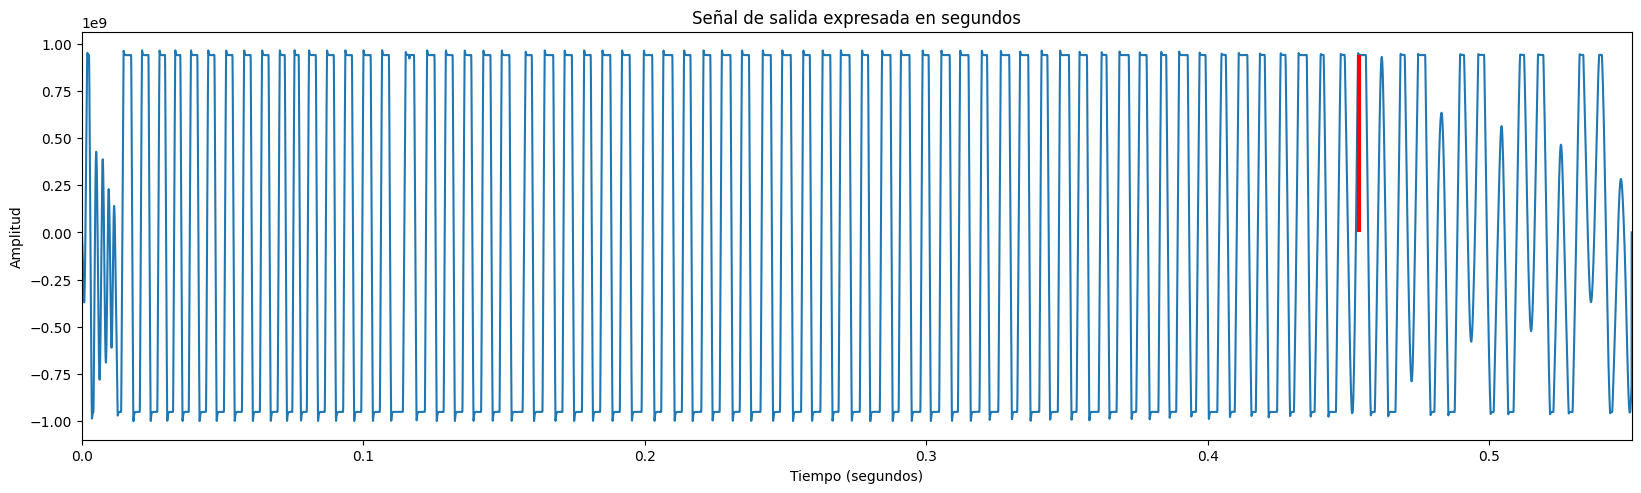

In [8]:
id_equipo = 9
path = '_10_23_19_18_54__Frec1(400)_IncF(50)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)'
file = '_Eco_19_18_54.json'
full_path = f'{DATA_PATH}/{id_equipo}/{path}/{file}'

df, output_signal = load_sample_file(full_path)
output_signal_norm = output_signal / np.max(np.abs(output_signal))

output_signal_sampling_freq = 930000 / df.Down
x_values = np.linspace(0, len(output_signal) / output_signal_sampling_freq, len(output_signal))

# Graficar señal
plot_signal_chunk_with_saturation_end_point(x_values, output_signal, 'Señal de salida expresada en segundos', output_signal_sampling_freq)

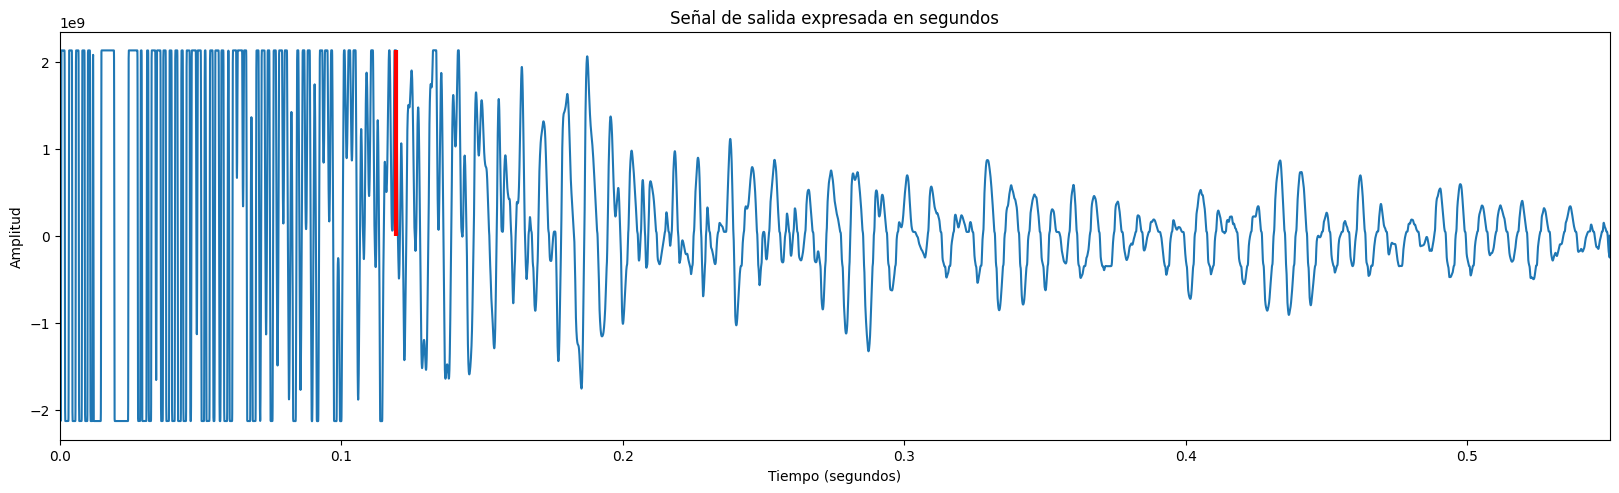

In [9]:
id_equipo = 2
path = '_10_23_19_22_02__Frec1(400)_IncF(50)_Nciclos(5)_SwIn(1)_Down(32)_Nsamp)16000)'
file = '_Eco_19_22_02.json'
full_path = f'{DATA_PATH}/{id_equipo}/{path}/{file}'

df, output_signal = load_sample_file(full_path)
output_signal_norm = output_signal / np.max(np.abs(output_signal))

output_signal_sampling_freq = 930000 / df.Down
x_values = np.linspace(0, len(output_signal) / output_signal_sampling_freq, len(output_signal))

# Graficar señal
plot_signal_chunk_with_saturation_end_point(x_values, output_signal, 'Señal de salida expresada en segundos', output_signal_sampling_freq)

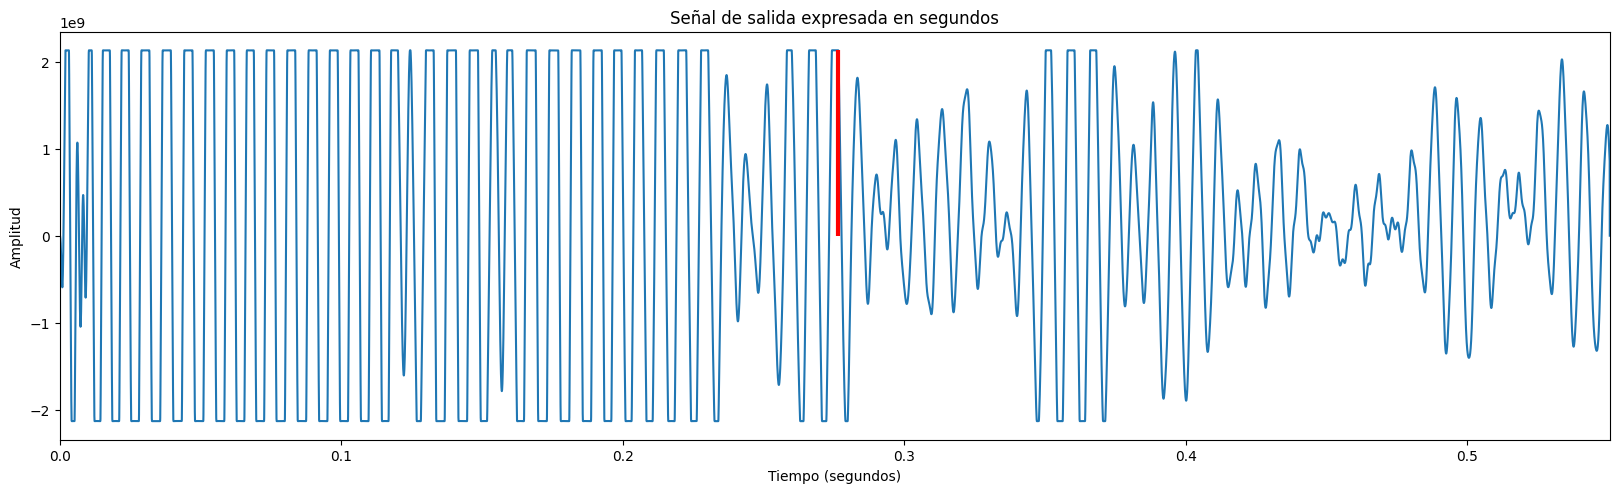

In [10]:
id_equipo = 3
path = '_10_24_00_16_42__Frec1(300)_IncF(150)_Nciclos(3)_SwIn(1)_Down(32)_Nsamp)16000)'
file = '_Eco_00_16_42.json'
full_path = f'{DATA_PATH}/{id_equipo}/{path}/{file}'

df, output_signal = load_sample_file(full_path)
output_signal_norm = output_signal / np.max(np.abs(output_signal))

output_signal_sampling_freq = 930000 / df.Down
x_values = np.linspace(0, len(output_signal) / output_signal_sampling_freq, len(output_signal))

# Graficar señal
plot_signal_chunk_with_saturation_end_point(x_values, output_signal, 'Señal de salida expresada en segundos', output_signal_sampling_freq)

# Cálculo mediante armónicos (relación entre frecuencias altas y bajas)

In [11]:
from scipy import signal
from scipy.fft import fftshift

In [12]:
f, t, Sxx = signal.spectrogram(x=np.array(output_signal),
                               fs=output_signal_sampling_freq,
                               window='boxcar',
                               nperseg=128,
                               noverlap=0)

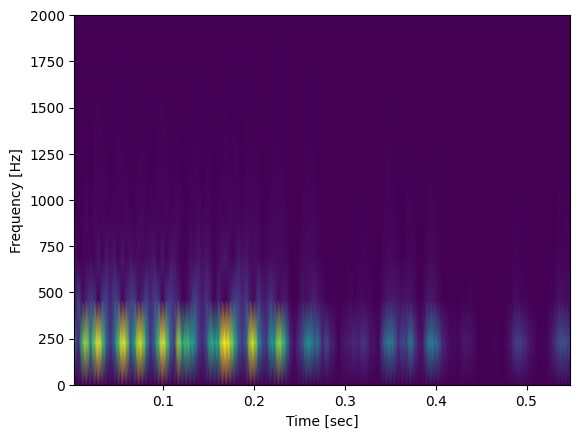

In [13]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2000)
plt.show()

In [14]:
freqs_relation = []
freq_cutoff = 4

for t_ix in range(Sxx.shape[1]):
    freqs_relation.append((np.abs(Sxx[freq_cutoff:, t_ix]) ** 2).sum() / (np.abs(Sxx[:freq_cutoff, t_ix]) ** 2).sum())

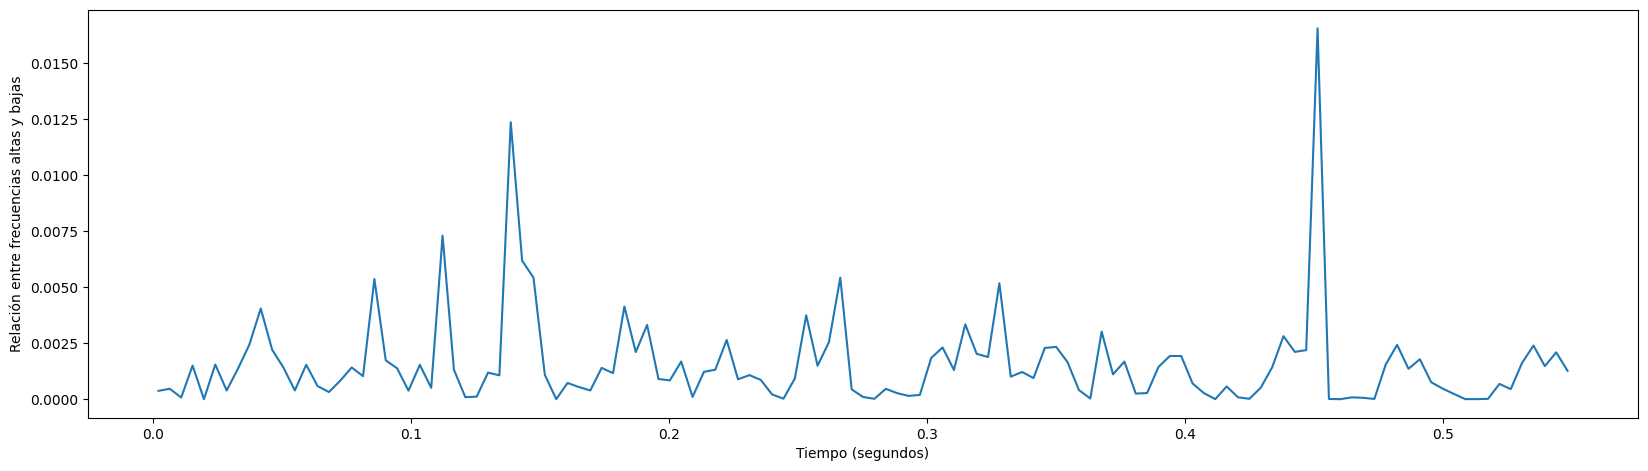

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))
fig.subplots_adjust(bottom=0.2)
ax.plot(t, freqs_relation) # agregar datos a la gráfica
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Relación entre frecuencias altas y bajas')
plt.show()